In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import applications, optimizers
import pandas as pd
import numpy as np
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Flatten, Activation, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras import applications, optimizers
import os
import wget
import pandas as pd
import os.path
import random as rd

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
!pip freeze --local > /content/drive/MyDrive/colab_installed.txt

In [2]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=1d3ec680d70c75100ae2b3918b513e620290fbfbbefb89486a4ef638c4c04a3b
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
os.getcwd()

'/content'

In [3]:
main_path = './drive/MyDrive/ColabNotebooks/'

In [ ]:
georges = pd.read_csv(main_path + 'georges.csv',encoding='ascii', header=None)
non_georges = pd.read_csv(main_path + 'non_georges.csv',encoding='ascii', header=None)

In [ ]:
# os.mkdir(main_path + 'Data')

In [ ]:
pict = main_path + "Georges"
for i in range(len(georges)):
    wget.download(georges[0][i], pict)

In [ ]:
pict = "./Non_georges"
for i in range(len(non_georges)):
    wget.download(non_georges[0][i], pict)

In [ ]:
class Make_data:

  def __init__(self, main_path, folders, train_folder, testval_folder, classes, class_csv):
    self.main_path = main_path
    self.train_folder = train_folder
    self.testval_folder = testval_folder
    self.classes = classes 
    self.folders = folders
    self.csv = class_csv
                
    
  
  def download_data(self):
    for i in range(2):
      data_class = pd.read_csv(self.main_path + self.csv[i],encoding='ascii', header=None)
      # non_georges = pd.read_csv(self.main_path + 'non_georges.csv',encoding='ascii', header=None)  
      # pict = main_path + classe
      for j in range(len(data_class)):
        wget.download(data_class[0][j], self.main_path + self.train_folder + self.classes[i] + '/')

  def make_dir(self):
      for folders in self.folders:
        for classe in self.classes:
          if folders == 'Test/':
            os.makedirs(self.main_path + folder + classe + '/' + classe)
          else: 
            os.makedirs(self.main_path + folder + classe)
        # os.mkdir(r'C:\Users\EFadeeva\Desktop\Make_Data\Data')
        # os.mkdir(r'C:\Users\EFadeeva\Desktop\Make_Data\Data\Georges')
        # os.mkdir(r'C:\Users\EFadeeva\Desktop\Make_Data\Data\Non_Georges')
        # os.mkdir(r'C:\Users\EFadeeva\Desktop\Make_Data\Val')
        # os.mkdir(r'C:\Users\EFadeeva\Desktop\Make_Data\Val\Georges')
        # os.mkdir(r'C:\Users\EFadeeva\Desktop\Make_Data\Val\Non_Georges')
        # os.mkdir(r'C:\Users\EFadeeva\Desktop\Make_Data\Test')
        # os.mkdir(r'C:\Users\EFadeeva\Desktop\Make_Data\Test\Georges')
        # os.mkdir(r'C:\Users\EFadeeva\Desktop\Make_Data\Test\Non_Georges')
    
  
  def divide_data(self):
      for folder in self.testval_folder:
        for classe in self.classes:
          # print(folder + '111')
          class_path = []
          class_name = []
          basepath = self.main_path + self.train_folder + classe
          # print(basepath)
          with os.scandir(basepath) as entries:
            for entry in entries:
                if entry.is_file():
                    class_path.append(entry.path)
                    class_name.append(entry.name)
                    # print(class_path[0])
          # print(entry.path[0])
          # print(len(class_path))
          rd.seed(1)
          random_index = rd.sample(range(len(class_path)), int(len(class_path)*0.1))
          for i in random_index:
            # print(self.main_path + folder + classe + '/' + class_name[i]) 
            os.rename(class_path[i], self.main_path + folder + classe + '/' + class_name[i])

          # path = "./Val/" + data + "/"

          # rd.seed(1)
          # random_index = rd.sample(range(len(data_path)), int(len(data_path)*0.2))

          # for i in random_index[:int(len(random_index)/2)]: 
          #   os.rename(data_path[i], path + data_name[i])

          # path = "./Test/" + data + "/"    

          # for i in random_index[int(len(random_index)/2):]:
          #     os.rename(data_path[i], path + data_name[i])
                
                
  
  def filter_data (self):
      num_skipped = 0
      for folder_name in self.classes:
          folder_path = self.main_path + self.train_folder + folder_name
          for fname in os.listdir(folder_path):
              fpath = os.path.join(folder_path, fname)
              if os.path.isfile(fpath):
                  try:
                      fobj = open(fpath, "rb")
                      is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
                  finally:
                      fobj.close()

                  if not is_jfif:
                      num_skipped += 1
                          # Delete corrupted image
                      os.remove(fpath)

      print("Deleted %d images" % num_skipped)

    

In [ ]:
md = Make_data(main_path, ['Train/','Val/', 'Test/'], 'Train/', ['Val/', 'Test/'], ['Georges', 'Non_Georges'], ['georges.csv', 'non_georges.csv'])

In [ ]:
md.make_dir()

In [ ]:
md.download_data()

In [ ]:
md.filter_data()

Deleted 3 images


In [ ]:
md.divide_data()

In [ ]:
# filter_data("./Val/", ("Georges", "Non_georges"))

Deleted 0 images


In [ ]:
# filter_data("./Test/", ("Georges", "Non_georges"))

Deleted 0 images


In [4]:
image_size = (180, 180)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    main_path + "Train",
    labels="inferred",
    class_names = ["Georges", "Non_Georges"],
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    main_path + "Val",
    labels="inferred",
    class_names = ["Georges", "Non_Georges"],
    validation_split=0.4,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 1379 files belonging to 2 classes.
Using 1104 files for training.
Found 377 files belonging to 2 classes.
Using 150 files for validation.


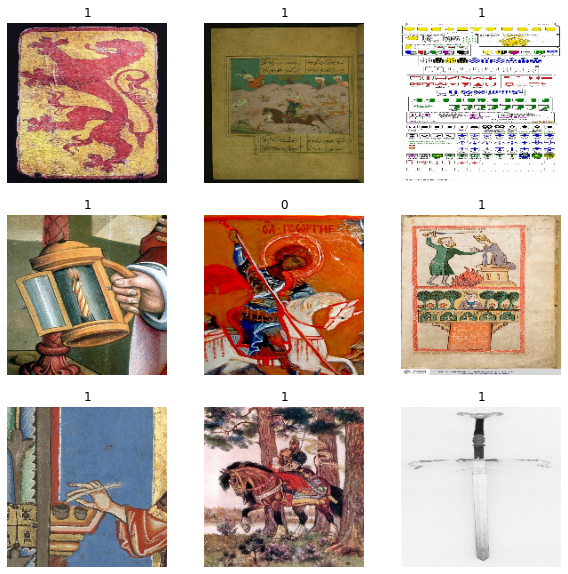

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [8]:
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomFlip("vertical"),
        layers.experimental.preprocessing.RandomRotation(0.1),
        # layers.experimental.preprocessing.RandomCrop(100, 100, seed = 1337),
        layers.experimental.preprocessing.Normalization(axis=-1)
    ]
)

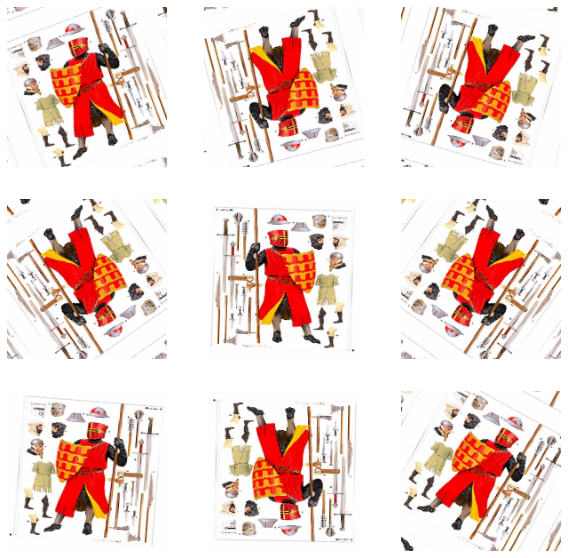

In [9]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [10]:
augmented_train_ds = train_ds.map(
  lambda x, y: (data_augmentation(x, training=True), y))

In [11]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.shuffle(1000, 1337).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

In [12]:
base_model = applications.InceptionResNetV2(weights='imagenet', 
                          include_top=False, 
                          input_shape=(image_size[0], image_size[0], 3))

In [13]:
base_model.trainable = False

In [15]:
x = base_model.output
x = Flatten()(x)
x = Dense(1, activation="relu")(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation="sigmoid")(x)
model = Model(inputs = base_model.input, outputs = predictions)
callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
]

model.compile(loss='binary_crossentropy', optimizer = optimizers.Adam(lr=0.001), metrics=['accuracy'])

In [16]:
history = model.fit(
    train_ds, epochs=20, callbacks=callbacks, validation_data=val_ds)
model.save(main_path + 'Model')


Epoch 1/20
35/35 [==============================] - 187s 5s/step - loss: 1.0565 - accuracy: 0.5636 - val_loss: 0.6913 - val_accuracy: 0.5867
Epoch 2/20
35/35 [==============================] - 115s 3s/step - loss: 0.6915 - accuracy: 0.5646 - val_loss: 0.6898 - val_accuracy: 0.5867
Epoch 3/20
35/35 [==============================] - 115s 3s/step - loss: 0.6894 - accuracy: 0.5914 - val_loss: 0.6885 - val_accuracy: 0.5867
Epoch 4/20
35/35 [==============================] - 114s 3s/step - loss: 0.6891 - accuracy: 0.5737 - val_loss: 0.6874 - val_accuracy: 0.5867
Epoch 5/20
35/35 [==============================] - 115s 3s/step - loss: 0.6902 - accuracy: 0.5477 - val_loss: 0.6865 - val_accuracy: 0.5867
Epoch 6/20
35/35 [==============================] - 115s 3s/step - loss: 0.6897 - accuracy: 0.5482 - val_loss: 0.6855 - val_accuracy: 0.5867
Epoch 7/20
35/35 [==============================] - 115s 3s/step - loss: 0.6867 - accuracy: 0.5737 - val_loss: 0.6847 - val_accuracy: 0.5867
Epoch 8/20
35

KeyboardInterrupt: ignored

In [ ]:
# for path in georg_path:
#     img = keras.preprocessing.image.load_img(path, target_size=(180, 180, 3))
#     img_array = keras.preprocessing.image.img_to_array(img)
#     img_array = tf.expand_dims(img_array, 0)  # Create batch axis

#     predictions = model.predict(img_array)
#     score = predictions[0]
#     print(score)
    

In [ ]:
# for path in georg_path:
#     img = keras.preprocessing.image.load_img(path, target_size=(180, 180, 3))
#     img_array = keras.preprocessing.image.img_to_array(img)
#     img_array = tf.expand_dims(img_array, 0)  # Create batch axis

#     predictions = model.predict(img_array)
#     score = predictions[0]
#     print(score)
    

In [17]:
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    # Image augmentation block
    x = data_augmentation(inputs)

    # Entry block
    x = layers.experimental.preprocessing.Rescaling(1.0 / 255)(x)
    x = layers.Conv2D(32, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(64, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [128, 256, 512, 728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    activation = "sigmoid"
    units = 1

    tf.random.set_seed(1337)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)


model = make_model(input_shape=image_size + (3,), num_classes=2)

In [18]:
epochs = 30

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
]
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
history = model.fit(
    train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds)
model.save(main_path + 'Model')

Epoch 1/30
35/35 [==============================] - 244s 7s/step - loss: 0.8570 - accuracy: 0.5632 - val_loss: 0.6841 - val_accuracy: 0.5867
Epoch 2/30
35/35 [==============================] - 241s 7s/step - loss: 0.6349 - accuracy: 0.6672 - val_loss: 0.6713 - val_accuracy: 0.5867
Epoch 3/30
35/35 [==============================] - 241s 7s/step - loss: 0.6464 - accuracy: 0.6522 - val_loss: 0.6739 - val_accuracy: 0.5867
Epoch 4/30
35/35 [==============================] - 241s 7s/step - loss: 0.6237 - accuracy: 0.6719 - val_loss: 0.6854 - val_accuracy: 0.5867
Epoch 5/30
35/35 [==============================] - 241s 7s/step - loss: 0.6240 - accuracy: 0.6812 - val_loss: 0.7066 - val_accuracy: 0.5867
Epoch 6/30
35/35 [==============================] - 242s 7s/step - loss: 0.6201 - accuracy: 0.6750 - val_loss: 0.7391 - val_accuracy: 0.5867
Epoch 7/30
35/35 [==============================] - 241s 7s/step - loss: 0.6047 - accuracy: 0.6968 - val_loss: 0.7774 - val_accuracy: 0.5867
Epoch 8/30
35

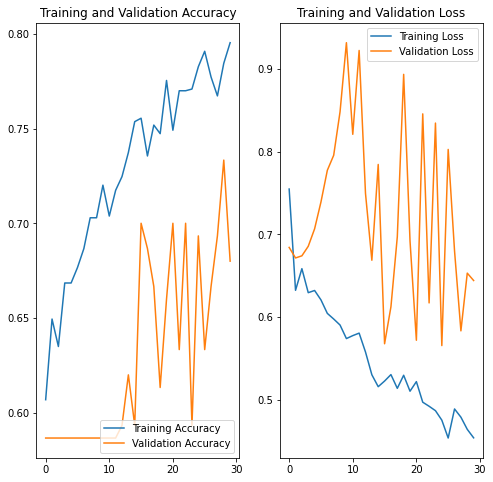

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
test = tf.keras.preprocessing.image_dataset_from_directory(
    main_path + "Test/Test",
    labels="inferred",
    class_names = ["Georges", "Non_Georges"],
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 449 files belonging to 2 classes.


In [ ]:
predT = model.predict(test)
# predT

array([[0.85799927],
       [0.16048053],
       [0.4281534 ],
       [0.9942137 ],
       [0.8506217 ],
       [0.89919674],
       [0.71198666],
       [0.35858706],
       [0.7416881 ],
       [0.92802083],
       [0.73971134],
       [0.871187  ],
       [0.9756599 ],
       [0.9685137 ],
       [0.82739264],
       [0.6506653 ],
       [0.46360448],
       [0.8605077 ],
       [0.86212194],
       [0.8758087 ],
       [0.9622787 ],
       [0.9496342 ],
       [0.9341142 ],
       [0.98206055],
       [0.91427493],
       [0.91649044],
       [0.7865346 ],
       [0.4495365 ],
       [0.88063717],
       [0.59043187],
       [0.9151444 ],
       [0.3768748 ],
       [0.9155573 ],
       [0.90980464],
       [0.5054472 ],
       [0.6878062 ],
       [0.9936421 ],
       [0.9468658 ],
       [0.49556145],
       [0.9341228 ],
       [0.594502  ],
       [0.93413746],
       [0.9656764 ],
       [0.9616498 ],
       [0.99123   ],
       [0.9285705 ],
       [0.9740456 ],
       [0.831

In [ ]:
testG = tf.keras.preprocessing.image_dataset_from_directory(
    main_path + "Test/Test_Georges",
    image_size = image_size,
    # labels = 'inferred',
)

Found 149 files belonging to 1 classes.


In [ ]:
testNG = tf.keras.preprocessing.image_dataset_from_directory(
    main_path + "Test/Test_Non_Georges",
    image_size = image_size,
    # labels = 'inferred',
)

Found 190 files belonging to 1 classes.


In [ ]:
def accur(true_label, pred_label, threshold, truefalse):
  sum = 0
  for label in pred_label:
    if truefalse:
      if label[0] < threshold:
        sum+=1
    else:
      if label[0] > threshold:
        sum+=1
  
  return sum
  


In [ ]:
predG = model.predict(testG)
predNG = model.predict(testNG)


In [ ]:
threshold = 0.7
accG = accur(len(os.listdir(main_path + "Test/Test_Georges/Georges")), predG, threshold, True)
accNG = accur(len(os.listdir(main_path + "Test/Test_Non_Georges/Non_Georges")), predNG, threshold, False)

print("accG = ", accG, "accNG = ", accNG)

accG =  89 accNG =  144


In [ ]:
pred = model.predict(testG)

In [ ]:
# predG

array([[0.21711752],
       [0.12512583],
       [0.77470756],
       [0.8117612 ],
       [0.72216713],
       [0.37824437],
       [0.86565006],
       [0.80705076],
       [0.5474347 ],
       [0.53214127],
       [0.694671  ],
       [0.32366318],
       [0.5447107 ],
       [0.6610111 ],
       [0.74268633],
       [0.43794647],
       [0.23835376],
       [0.66921043],
       [0.3597172 ],
       [0.7922967 ],
       [0.7453587 ],
       [0.09378797],
       [0.8026516 ],
       [0.9136641 ],
       [0.79518855],
       [0.94187844],
       [0.7728334 ],
       [0.69051695],
       [0.27503112],
       [0.6240461 ],
       [0.92677075],
       [0.8507557 ],
       [0.5398397 ],
       [0.1235683 ],
       [0.6111195 ],
       [0.45427817],
       [0.39973462],
       [0.74010354],
       [0.6111511 ],
       [0.5001092 ],
       [0.8508158 ],
       [0.74660885],
       [0.09430212],
       [0.14772743],
       [0.613717  ],
       [0.8132678 ],
       [0.51270366],
       [0.458

In [ ]:
accuracy_G = 

Found 190 files belonging to 1 classes.


In [ ]:
pred = model.predict(testNG)

In [ ]:
# pred

array([[0.8719138 ],
       [0.6959517 ],
       [0.6594089 ],
       [0.9558399 ],
       [0.78455627],
       [0.40883255],
       [0.68782043],
       [0.7162715 ],
       [0.45933726],
       [0.84893095],
       [0.79091597],
       [0.52132267],
       [0.542242  ],
       [0.8384186 ],
       [0.5431548 ],
       [0.93209255],
       [0.6754407 ],
       [0.5732112 ],
       [0.7392254 ],
       [0.6709969 ],
       [0.8155669 ],
       [0.7714738 ],
       [0.7097555 ],
       [0.71619606],
       [0.84032845],
       [0.78526044],
       [0.7385669 ],
       [0.7418773 ],
       [0.76233625],
       [0.6998204 ],
       [0.8397275 ],
       [0.7673154 ],
       [0.4988323 ],
       [0.8520154 ],
       [0.88140595],
       [0.81071496],
       [0.7418431 ],
       [0.655165  ],
       [0.47123224],
       [0.51441616],
       [0.9033524 ],
       [0.46831962],
       [0.6419184 ],
       [0.7150195 ],
       [0.71471417],
       [0.8771336 ],
       [0.76444393],
       [0.905

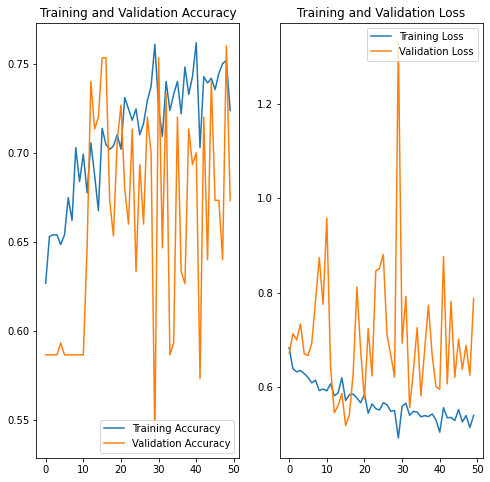

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
georg_path[0]

'./drive/MyDrive/ColabNotebooks/Test/Georges/250ea3a23469f912724d6778ed621e06.jpg'

In [ ]:
pred = model.predict(georg_path[0:10])

ValueError: ignored

In [ ]:
non_georg_path = []
basepath = "./Test/Non_georges"
with os.scandir(basepath) as entries:
    for entry in entries:
        if entry.is_file():
            non_georg_path.append(entry.path)

In [ ]:
def define(path):

    img = keras.preprocessing.image.load_img(path, target_size=image_size)
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch axis

    predictions = model.predict(img_array)
    score = predictions[0]
    return float(score)

In [ ]:
def roc(georg_path, non_georg_path, threshold):
    
    threshold -=0.4
    while (threshold <= 0.2):
        true_positive_label = 0
        false_positive_label = 0
        true_negative_label = 0
        false_negative_label = 0
        sensivity = []
        specifity = []

        for path in georg_path:
            if define(path) < threshold:
                true_positive_label += 1
            else:
                false_positive_label += 1

        for path in non_georg_path:
            define(path)
            if define(path) > threshold:
                true_negative_label += 1
            else:
                false_negative_label += 1

        print("Confusion Matrix ",np.array([[true_positive_label, false_positive_label], [false_negative_label, true_negative_label]]))
        if true_positive_label == 0 & false_negative_label ==0:
            sensivity.append(0)
            specifity.append(1)
            threshold+=0.05
            continue
        if false_negative_label == 0 & false_positive_label ==0:
            sensivity.append(1)
            specifity.append(1)
            threshold+=0.05
            continue
        sensivity.append(true_positive_label/(true_positive_label + false_negative_label))
        specifity.append(1-true_positive_label/(true_positive_label + false_negative_label))
        threshold+=0.05
    plt.plot(specifity, sensivity)

In [ ]:
roc(georg_path, non_georg_path, 0.16)

NameError: name 'roc' is not defined

In [ ]:
true_positive_label = 0
false_positive_label = 0
for path in georg_path:
    if define(path) < 0.16:
        true_positive_label += 1
    else:
        false_positive_label += 1

In [ ]:
true_positive_label

178

In [ ]:
false_positive_label

72

In [ ]:
true_negative_label = 0
false_negative_label = 0
for path in non_georg_path:
    define(path)
    if define(path) > 0.16:
        true_negative_label += 1
    else:
        false_negative_label += 1

In [ ]:
true_negative_label

340

In [ ]:
false_negative_label

60

In [ ]:
np.array([[true_positive_label, false_positive_label], [false_negative_label, true_negative_label]])

array([[178,  72],
       [ 60, 340]])

In [ ]:
sensivity = []
specifity = []

In [ ]:
sensivity.append(true_positive_label/(true_positive_label + false_negative_label))
specifity.append(1-true_positive_label/(true_positive_label + false_negative_label))

[0.7478991596638656]

In [ ]:
# plot roc curve for a specific class
plt.figure()
lw = 2
spec_class =27
plt.plot(fpr[spec_class], tpr[spec_class], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()